In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# feature.txt가 컬럼의 이름, X_test같은 파일엔 데이터만 들어있음

In [4]:
# 컬럼 이름
feature_name_df = pd.read_csv('./human_activity/features.txt',
                              sep='\s+',
                              header=None,
                              names=['column_index','column_name'])   
# txt 파일이지만 줄 나눔으로 데이터 구분됨 -> sep 지정. \s+ 공백이 하나 이상
# header 없으니 header=None
# names로 직접 컬럼 이름 설정
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [5]:
feature_name = feature_name_df.iloc[:,1].values.tolist() 
# 행은 전부 다, 열은 2개 중에 뒤에 있는 것을 가져옴
# ndarray를 list로 바꿈

In [6]:
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [9]:
pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name) 
# ,가 아닌 공백으로 구분됨
# 컬럼 이름이 똑같은 필드명이 있어 오류가 남
# 컬럼 이름 중복 여부 확인 -> 몇 개가 있나

ValueError: Duplicate names are not allowed.

In [12]:
# 이름이 중복되는 열 
dup = feature_name_df.groupby('column_name').count()

In [15]:
dup[dup['column_index']>1].head(3) # column_index가 1보다 많은 즉, 중복인 것만 보기

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3


In [27]:
# 이름이 중복되는 열은 열_1 열_2 ... 이런식으로 처리하기
def get_new_feature_name_df(old):
    dup = pd.DataFrame(data=old.groupby('column_name').cumcount(),columns=['dup_cnt']) 
    # 컬럼 이름이 같은 것끼리 묶어서 데이터프레임으로 만들기
    dup = dup.reset_index()
    # print(dup.head())
    # print(old.reset_index().head())
    new = pd.merge(old.reset_index(),dup,how='outer') # 인덱스를 기준으로 연결 how='outer' 데이터 안 빠지도록
    new['column_name'] = new[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1 ) 
    # new에 두 열을 선택해서 x값은 'column_name','dup_cnt'임.
    #  x[0]+'_'+str(x[1]) => 'column_name'와 'dup_cnt' 사이에 문자열 '_' 연결하는데 
    # 'column_name'는 str타입, dup_cnt는 int타입이므로 str로 바꿔야
    # if x[1]>0 else x[0] => dup_cnt이 0보다 큰, 즉 중복되는 경우에만 _1 등을 붙여주고 0인 경우 원래 이름만
    new.drop(columns=['index'],inplace=True)
    return new

In [28]:
result = get_new_feature_name_df(feature_name_df)
result[result['dup_cnt']>0] # 중복되는 열에 일련번호를 붙임(1번 중복이면 1붙이고 2번 중복이면 2붙이고) 일련번호가 0보다 크면 표시

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [26]:
result[result['dup_cnt']>-1]
# 0은 안붙은 것 확인

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [32]:
# 지금까지 했던 것 정리
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt',
                              sep='\s+',
                              header=None,
                              names=['column_index','column_name'])
    # 함수 호출
    new_name = get_new_feature_name_df(feature_name_df)
    # 리스트로 만들기
    feature_name = new_name.iloc[:,1].values.tolist() # column_name	
    # X_train 가져오기
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    # X_test 가져오기
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    # y_train 가져오기
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',names=['action'])
    # y_test 가져오기
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',names=['action'])
    return X_train,X_test,y_train,y_test
    

In [33]:
X_train,X_test,y_train,y_test = get_human_dataset()

In [35]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [37]:
y_train['action'].value_counts()
# 분포는 비교적 고름

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [40]:
## 정확도 검증
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 이진분류 아닌 다중분류이고 분포가 고르기 때문에 정확도도 평가지표로 괜찮음

In [41]:
dt_clt = DecisionTreeClassifier(random_state=156)
dt_clt.fit(X_train,y_train)
pred = dt_clt.predict(X_test)
accuracy_score(y_test,pred)

0.8547675602307431

In [42]:
dt_clt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [43]:
# Grid~~로 튜닝
from sklearn.model_selection import GridSearchCV

In [46]:
%%time 
params = { 
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
    # 다양한 범위를 조금씩 넣어서 테스트해보고 잘 나오는 구간을 한정해서 더 테스트
}
grid_cv = GridSearchCV(dt_clt,params,scoring='accuracy',cv=5,verbose=1) # scoring='accuracy' 점수는 정확도로, 데이터가 많은 경우 화면에 변화를 주기 위해 verbose=1
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}
CPU times: total: 2min 21s
Wall time: 2min 21s


In [47]:
pd.DataFrame(grid_cv.cv_results_)[['param_max_depth','mean_test_score']]
# max depth가 8일 때 적합 -> 과대적합 방지

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [48]:
%%time 
params = { 
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
    # 다양한 범위를 조금씩 넣어서 테스트해보고 잘 나오는 구간을 한정해서 더 테스트
}
grid_cv = GridSearchCV(dt_clt,params,scoring='accuracy',cv=5,verbose=1) # scoring='accuracy' 점수는 정확도로, 데이터가 많은 경우 화면에 변화를 주기 위해 verbose=1
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}
CPU times: total: 2min 50s
Wall time: 2min 50s


In [49]:
# max depth는 앞에서 8로 찾았는데 min samples split는 24와 비교했을 때 어떻게 달라지는지 확인
# -> 16일때 더 적합하다고 나옴
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)
# 정확도

0.8717339667458432

In [50]:
# 피처간의 중요도 파악
im = grid_cv.best_estimator_.feature_importances_
# 정렬해야함

In [54]:
# 내림차순으로 정렬
top10 = pd.Series(im,index=X_train.columns).sort_values(ascending=False)[:10] # 10개만 뽑기
# 컬럼 하나라 시리즈
# X_traind의 컬럼값을 인덱스로
top10

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
dtype: float64

<AxesSubplot: >

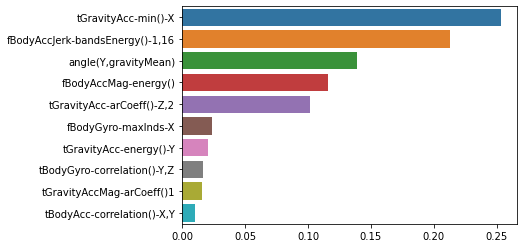

In [55]:
import seaborn as sns
sns.barplot(x=top10,y=top10.index)